In [2]:
# dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# raw data files
ardd_path = "../data_raw/ardd_fatalities Sep 2020.csv"

# read the mouse data and the death by type rate
# add header = 1 to remove the extra row in the CSV file
# ardd = pd.read_csv(ardd_path)

## ADDED BY JOHN TO REMOVE WARNING
ardd = pd.read_csv(ardd_path, low_memory=False)
## END

ardd.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,...,Age,National Remoteness Areas,SA4 Name 2016,National LGA Name 2017,National Road Type,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,3:11,Single,-9,-9,-9,...,16,Inner Regional Australia,Bendigo,Greater Bendigo (C),National or State Highway,No,No,0_to_16,Weekend,Night


In [3]:
# remove unwanted columns "National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"
clean_ardd = ardd.drop(columns=["National Remoteness Areas","SA4 Name 2016","National LGA Name 2017","National Road Type"])



# gather latest and earliest year for the title
min_year = clean_ardd["Year"].min()
max_year = clean_ardd["Year"].max()

# replace the "_" with " " in column "Age Group"
clean_ardd["Age Group"] = clean_ardd["Age Group"].str.replace("_"," ")

# remove the ":" in column "Time"
clean_ardd["Time"] = clean_ardd["Time"].str.replace(":","")

# replace "-9" with Unknown as described in the data dictionary
clean_ardd=clean_ardd.replace({"-9":"Unknown"})
clean_ardd.head(1)

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,311,Single,Unknown,Unknown,Unknown,Unknown,Passenger,Male,16,No,No,0 to 16,Weekend,Night


In [4]:
clean_ardd['Gender'].value_counts()

Male           36980
Female         14714
Unknown           26
Unspecified        1
Name: Gender, dtype: int64

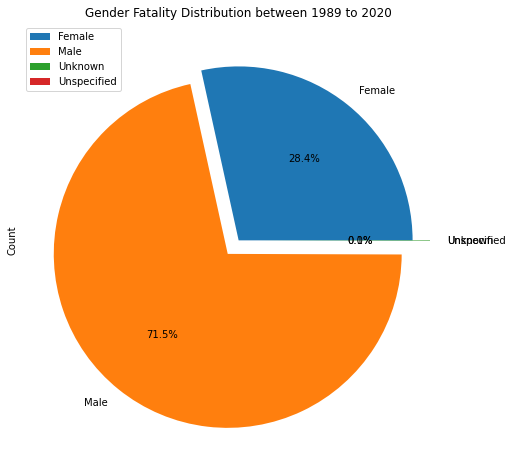

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = clean_ardd[["Crash ID","Gender"]]
groupby_gender = gender_df.groupby(["Gender"])

# calculate count
count = groupby_gender["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_gender_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0,0.1,0.1,0.1]
plot = groupby_gender_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Gender Fatality Distribution between {min_year} to {max_year}")
plt.show()

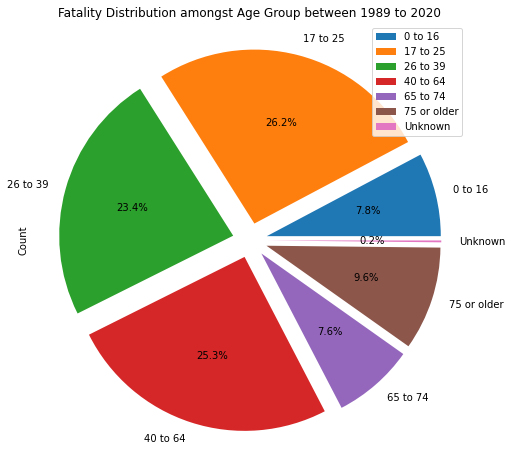

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ageg_df = clean_ardd[["Crash ID","Age Group"]]
groupby_ageg = ageg_df.groupby(["Age Group"])

# calculate count
count = groupby_ageg["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_ageg_df = pd.DataFrame({"Count": count
                           })

# set the explode value
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plot = groupby_ageg_df.plot.pie(y="Count",explode = explode, figsize=(8,8), startangle=0, autopct="%1.1f%%")
plt.title(f"Fatality Distribution amongst Age Group between {min_year} to {max_year}")
plt.show()

In [9]:
# capture fatality data after 2000
df = clean_ardd[clean_ardd.Time != "Unknown"]
df['Year'] = df['Year'].astype(int)

df = df.loc[df['Year'] >= 2000]
df.head()

C:\Users\jakeb\anaconda3\envs\class_31\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Bus Involvement,Heavy Rigid Truck Involvement,Articulated Truck Involvement,Speed Limit,Road User,Gender,Age,Christmas Period,Easter Period,Age Group,Day of week,Time of day
0,20202012,Vic,9,2020,Monday,311,Single,Unknown,Unknown,Unknown,Unknown,Passenger,Male,16,No,No,0 to 16,Weekend,Night
1,20202008,Vic,9,2020,Saturday,2255,Multiple,Unknown,Unknown,Unknown,Unknown,Driver,Male,27,No,No,26 to 39,Weekend,Night
2,20203042,Qld,9,2020,Thursday,2300,Single,No,No,No,100,Driver,Male,31,No,No,26 to 39,Weekday,Night
3,20203024,Qld,9,2020,Friday,1800,Single,No,No,No,80,Motorcycle rider,Male,29,No,No,26 to 39,Weekend,Night
4,20202070,Vic,9,2020,Sunday,800,Single,Unknown,Unknown,Unknown,Unknown,Driver,Male,20,No,No,17 to 25,Weekend,Day


In [10]:
# capture fatality data after year 2010
c_df = df.loc[df['Year'] >= 2010]
c_df = df.Time.value_counts().reset_index().rename(columns={'index': 'Time', 'Time': 'Count'})

# update data type to integer
c_df['Time'] = c_df['Time'].astype(int)

# sort result by Time
c_df = c_df.sort_values(by='Time', ascending=True)
c_df

,Time,Count
22,0,236
100,1,69
323,2,9
841,3,4
577,4,5
...,...,...
200,2355,43
836,2356,4
716,2357,4
357,2358,8


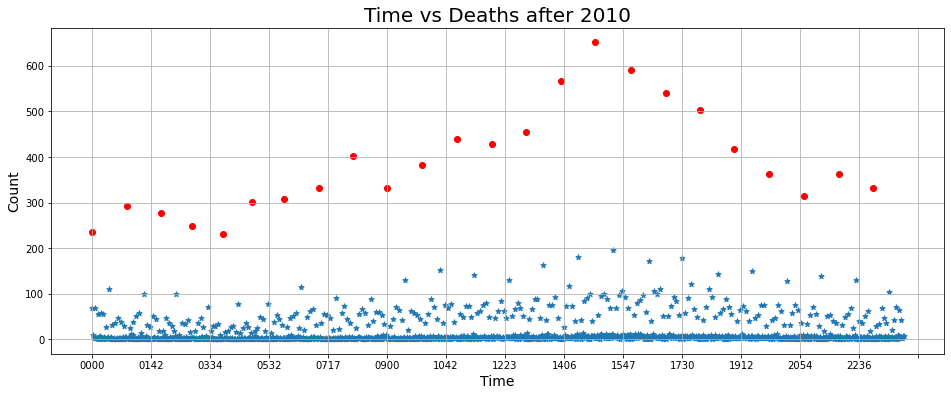

In [11]:
# plot graph to show Time vs Deaths after 2010
fig, ax = plt.subplots(figsize=(16, 6))
# marker_size=5

# arrange the x interval
plt.xticks(np.arange(0, 2400, step=100))

plt.scatter(c_df['Time'].map("{:04}".format),c_df['Count'], s= 30 ,marker = "*")
plt.title('Time vs Deaths after 2010',fontsize =20)
plt.xlabel('Time',fontsize =14)
plt.ylabel('Count',fontsize =14)
ax.grid()

# highlight the number of fatalities that's with the greatest trend
cc_df = c_df.query('Count >= 200')
plt.scatter(cc_df["Time"].map("{:04}".format), cc_df["Count"],  alpha=1, color="red" , marker="o")

plt.show()

In [12]:
# # df = clean_ardd[clean_ardd.Time != "Unknown"]
# df = df[["Time","Dayweek"]]
# df["Dayweek No."] = df["Dayweek"].str.replace('Monday','1')\
# .replace('Tuesday',"2")\
# .replace('Wednesday',"3")\
# .replace('Thursday',"4")\
# .replace('Friday',"5")\
# .replace('Saturday',"6")\
# .replace('Sunday',"7")
# df = df.sort_values(by=['Dayweek No.'], ascending=True)
# df

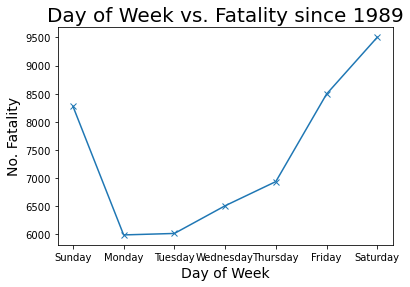

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
dc_df = clean_ardd[["Dayweek","Crash ID"]]

# group by the Day of Week and count the number of fatality
groupby_dayweek = dc_df.groupby(["Dayweek"])

# calculate count
count = groupby_dayweek["Crash ID"].count()

# create a dataframe to hold Sex and Count
groupby_dayweek_df = pd.DataFrame({"Count": count
                           })

# manually rearrange the Day of Week index
groupby_dayweek_df = groupby_dayweek_df.reindex(['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday'])

# plot the graph
plt.plot(groupby_dayweek_df, marker = "x")

plt.title(f"Day of Week vs. Fatality since {min_year}",fontsize =20)
plt.ylabel("No. Fatality",fontsize =14)
plt.xlabel("Day of Week",fontsize =14)
plt.show()

In [14]:
##### CYRUS OLD CODE
# Commented out but kept for legacy purposes

# # Max Speed vs. Fatality Rate - Cyrus
# # ---------------- Start ----------------

# # dependencies and Setup
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import scipy.stats as st
# from scipy.stats import linregress

# # raw data files
# max_spd_path = "data_raw/max_speed_limits_by_country.csv"
# death_by_type_path = "data_raw/deaths_by_vehicle_type.csv"
# tot_death_by_cty_path = "data_raw/total_deaths_by_country.csv"

# # read the mouse data and the death by type rate
# # add header = 1 to remove the extra row in the CSV file
# max_spd = pd.read_csv(max_spd_path, header=1)

# # header contains "Distribution of road traffic deaths by type of road user (%)"
# death_by_typ = pd.read_csv(death_by_type_path, header=1,)

# # header contains "Estimated number of road traffic deaths" & "Estimated road traffic death rate (per 100 000 population)
# tot_death_by_cty = pd.read_csv(tot_death_by_cty_path, header=1,)


# # combine the data into a single dataset
# combined_data = pd.merge(max_spd, tot_death_by_cty,on=["Country"], how = "inner")

# # remove the extra space in front of the columns
# combined_data = combined_data.rename(columns = {" Urban":"Urban Max Speed",
#                                                 " Rural":"Rural Max Speed", 
#                                                 " 2016":"Est. no. of road traffic deaths",
#                                                 " 2016.1":"Est. road traffic death rate (per 100 000 population)",
#                                                 })

# ## for column "Urban Max Speed" and "Rural Max Speed" 
# # drop all rows containing "?" or "No"
# combined_data = combined_data[~combined_data['Rural Max Speed'].isin(['?',"No","No "])]
# combined_data = combined_data[~combined_data['Urban Max Speed'].isin(['?',"No","No "])]
# # as the max speed column contains a range of numbers, this is to capture the last number in the cell
# combined_data["Rural Max Speed"] = combined_data["Rural Max Speed"].str.split().str[-1]
# combined_data["Urban Max Speed"] = combined_data["Urban Max Speed"].str.split().str[-1]
# # convert data type from string to integer
# combined_data['Rural Max Speed'] = combined_data['Rural Max Speed'].astype(int)
# combined_data['Urban Max Speed'] = combined_data['Urban Max Speed'].astype(int)

# ## for column "Est. no. of road traffic deaths"
# # remove all spaces within the column 
# combined_data['Est. no. of road traffic deaths'] = combined_data['Est. no. of road traffic deaths'].str.replace(" ","")
# # extract the numbers before the character "[" 
# combined_data['Est. no. of road traffic deaths'] = combined_data['Est. no. of road traffic deaths'].str.split('[').str[0]
# # convert data type from string to integer
# combined_data['Est. no. of road traffic deaths'] = combined_data['Est. no. of road traffic deaths'].astype(int)

# # display the data table for preview
# combined_data.head()

# # For me, only 12 countries couldn't show the correlation between speed limit and death rate
# # I included the code in case if we need to sort the country

# # # list the required contries for easier editting
# # countries = ["Australia",
# #              "United States of America",
# #              "United Kingdom of Great Britain and Northern Ireland",
# #              "Spain",
# #              "Sweden",
# #              "Germany",
# #              "Israel",
# #              "Canada",
# #              "Argentina",
# #              "Belgium",
# #              "Finland",
# #              "Greece",]

# # # select the required countries
# # combined_data = combined_data[combined_data["Country"].isin(countries)]

# # # display the data table for preview
# # combined_data.head()

# # platting the graph for Est. Road Traffic Death Rate vs. Rural Speed Limit
# x_values = combined_data['Rural Max Speed']
# y_values = combined_data['Est. road traffic death rate (per 100 000 population)']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Rural speed limit')
# plt.ylabel('Est. road traffic death rate\n(per 100 000 population)')
# plt.title("Est. Road Traffic Death Rate vs. Rural Speed Limit",fontsize=15)
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# # platting the graph for Est. Road Traffic Death Rate vs. Urban Speed Limit
# x_values = combined_data['Urban Max Speed']
# y_values = combined_data['Est. road traffic death rate (per 100 000 population)']
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('Urban speed limit')
# plt.ylabel('Est. road traffic death rate\n(per 100 000 population)')
# plt.title("Est. Road Traffic Death Rate vs. Urban Speed Limit",fontsize=15)
# print(f"The r-squared is: {rvalue**2}")
# plt.show()

# # ---------------- End ----------------
# # Max Speed vs. Fatality Rate - Cyrus